In [5]:
import numpy as np
from netCDF4 import Dataset
from datetime import date, timedelta
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from generate_boundaries_states import main 
import sys
import os
from matplotlib.pyplot import figure


Wrote bounds data for states: ['WA', 'UT'] to: state_bounds/WA_UT_state_MERRA_Format_Bounds.xlsx


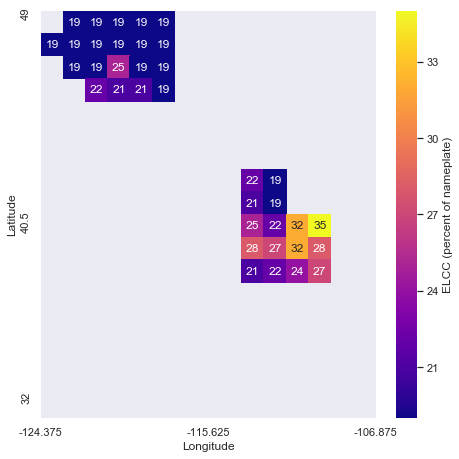

In [6]:
#ENTER the state abreviations for desired state(s) bounds, only looking at WECC

#WASHINGTON and oregon bounds are slightly off on the west coast but is due to the values were inputting
#Possible states and their respective state abreviations
'''
Arizonia: AZ
California: CA
Colorado: CO
Idaho: ID
Montana: MT
New Mexico: NM
Nevada: NV
Oregon: OR
Utah: UT
Washington: WA
Wyoming: WY

if you want to look at all of them for some reason type all
'''
stateList = ["WA","UT"]
filePathResults = "california/2016/1_GW_Wind_500_MW_1_Hour_Storage_results.csv"

#reads in raw data from results csv
raw_Data = pd.read_csv(filePathResults)


maxLat = np.max(raw_Data['latitude'].values)
minLat = np.min(raw_Data['latitude'].values)

maxLon = np.max(raw_Data['longitude'].values)
minLon = np.min(raw_Data['longitude'].values)

fileName = "state_bounds/" + '_'.join(map(str, stateList))  + "_state_MERRA_Format_Bounds.xlsx"

if os.path.isfile(fileName):
    print("file already exists for state bounds, not generating new excel file")
else:
    main(minLon, maxLon,minLat, maxLat,True,stateList,fileName)

bounds = np.flip(pd.read_excel(fileName,index_col=0).values,axis=0)

mainArray = dict()
for row in raw_Data.values:
    mainArray[row[2],row[3]] = row[1]

#creating panda array with lat and long as indices and ELCC as values
pandaArray = pd.Series(list(mainArray.values()),
                  index=pd.MultiIndex.from_tuples(mainArray.keys()))

#filling in any values not in ranges
df = pandaArray.unstack().fillna(0)

#creating axix for lat and lon values
#newYaxis = np.arange(maxLat, minLat-1,-1)
#newXaxis= np.arange(minLon,maxLon+1.25,10)

#feel free to change color or bounds for axis or bound size(may be out of wack for now)
regionArray = np.flip(df.values,axis=0)

cleanedRegion = np.where(bounds == 1,regionArray,np.nan)
plt.figure(figsize=(7.5,7.5))

ax = sns.heatmap(cleanedRegion,annot=True,cbar_kws={'label': 'ELCC (percent of nameplate)'},cmap='plasma')
#creating labels
plt.yticks([0,9,cleanedRegion.shape[0]-1],[49,40.5,32])
plt.xticks([0,7.5,cleanedRegion.shape[1]],[-124.375,-115.625,-106.875])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()